# Employee Attrition Prediction 

In [317]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [318]:
data = pd.read_excel("/Users/home/Desktop/Datasets/Datasets/Attrition Case Study.xlsx",sheet_name ="HR-Employee-Attrition")

In [319]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [321]:
#As EmployeeNumber have all the Unique value, we will drop Customer Id
data = data.drop(labels=['EmployeeNumber'],axis=1)

In [322]:
#chceking for unigue categories inside each feature
data.nunique()

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

# EDA and Data preprocessing

In [323]:
data.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [324]:
# chceking for null values if any
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

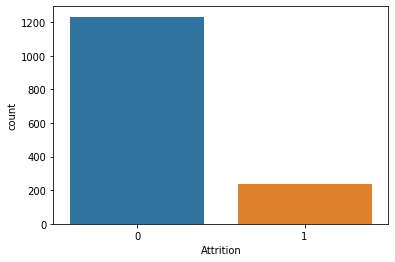

In [325]:
sb.countplot(data['Attrition'])

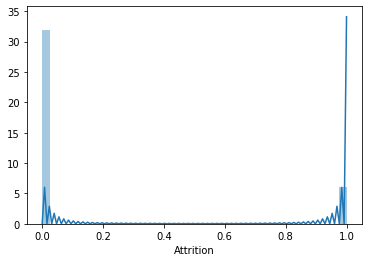

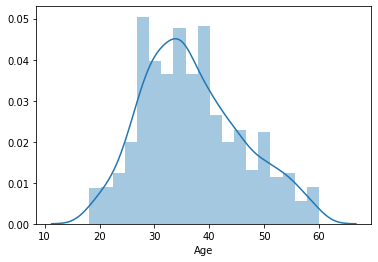

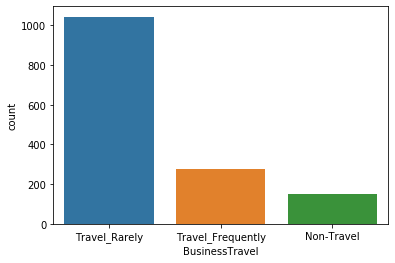

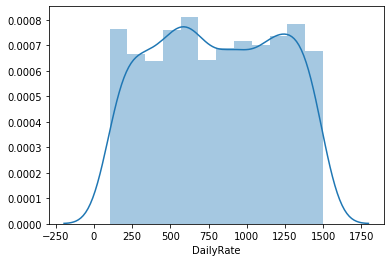

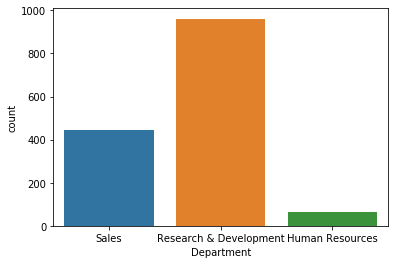

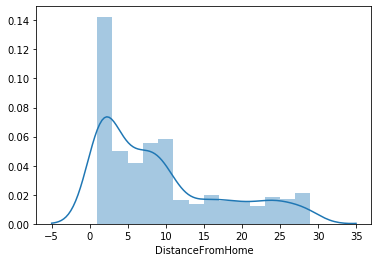

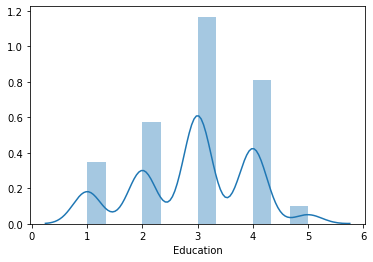

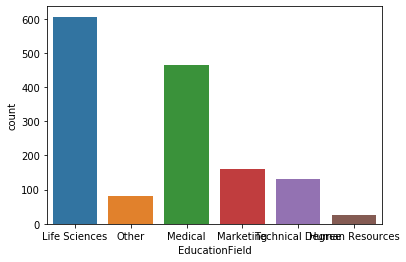

C:\Users\home\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\home\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


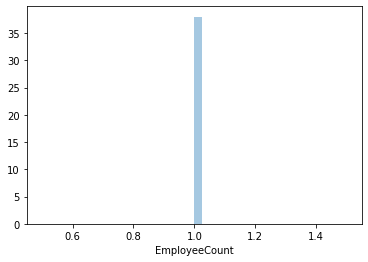

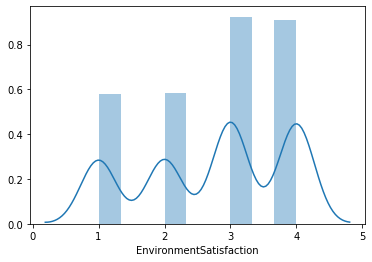

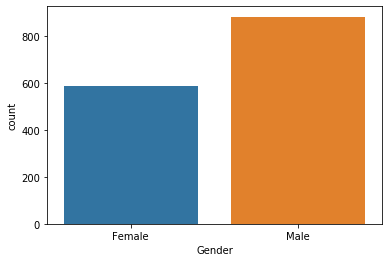

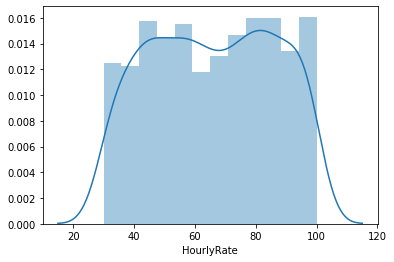

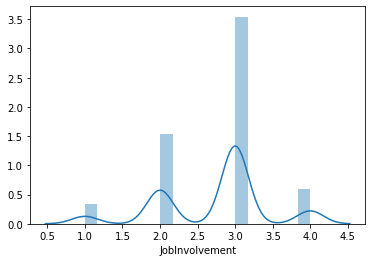

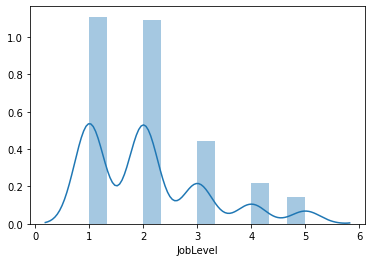

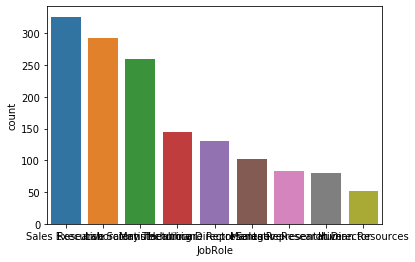

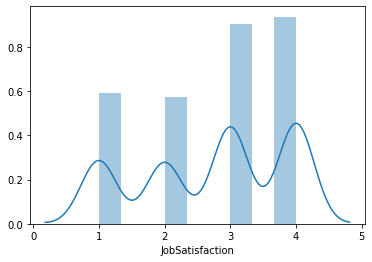

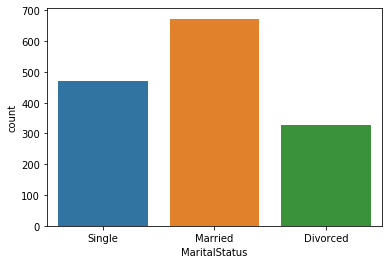

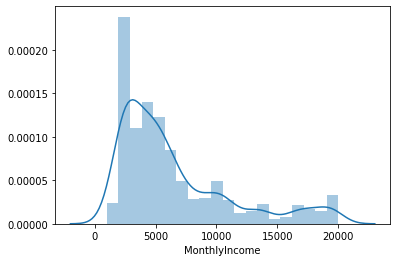

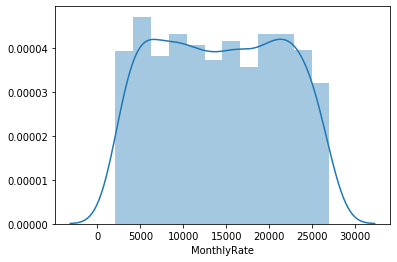

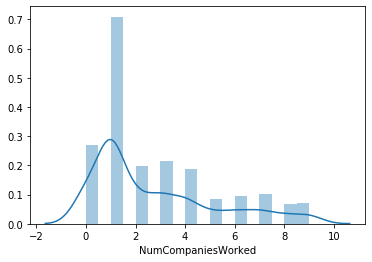

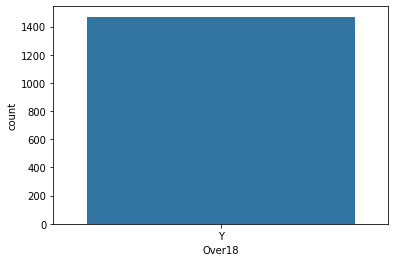

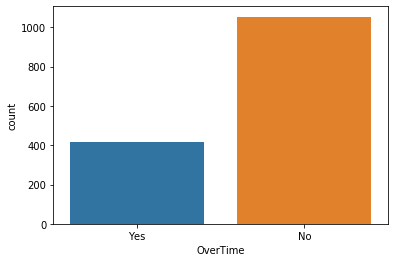

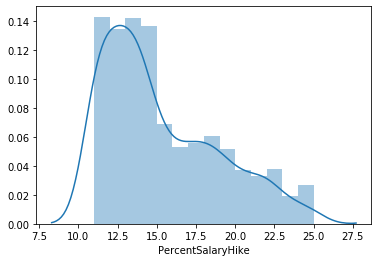

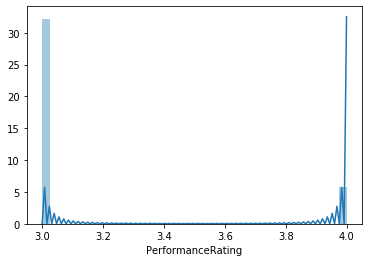

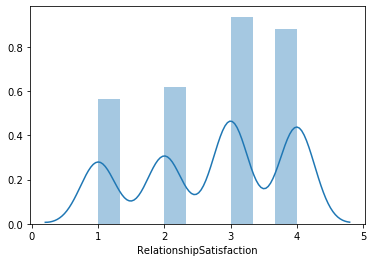

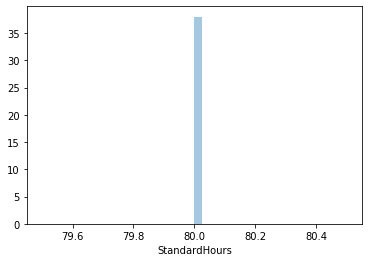

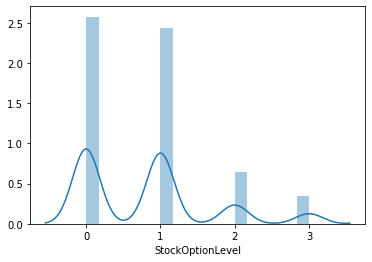

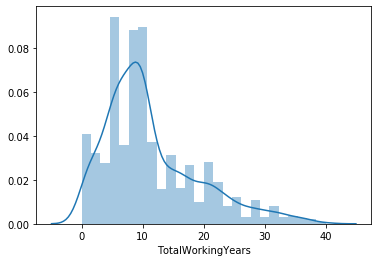

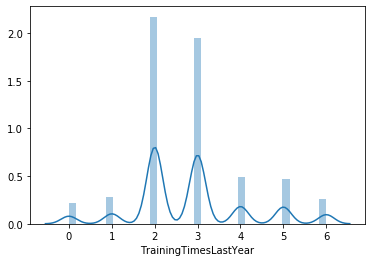

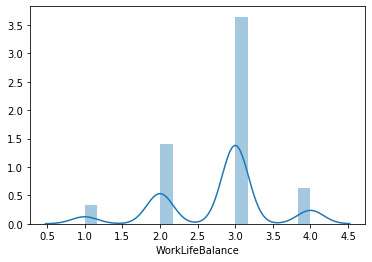

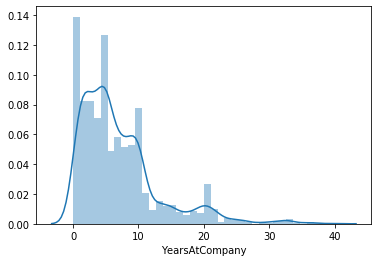

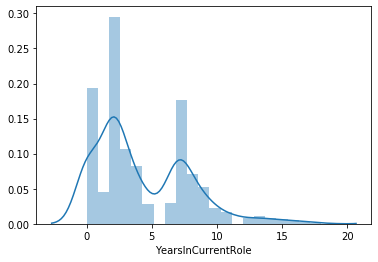

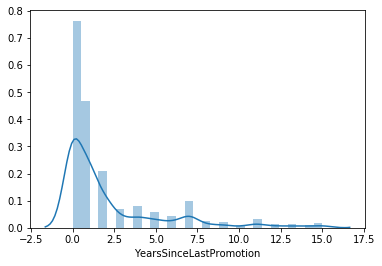

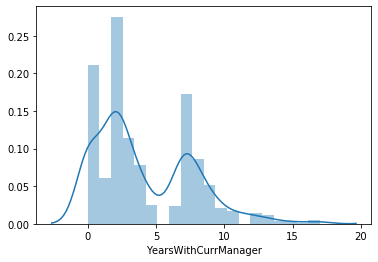

In [326]:
# univariant Analysis
import seaborn as sb
for i in data.columns:
    if(data[i].dtypes=="object"):
        sb.countplot(data[i])
        plt.show()
    else:
        sb.distplot(data[i])
        plt.show()

In [327]:
len(data.columns)

34

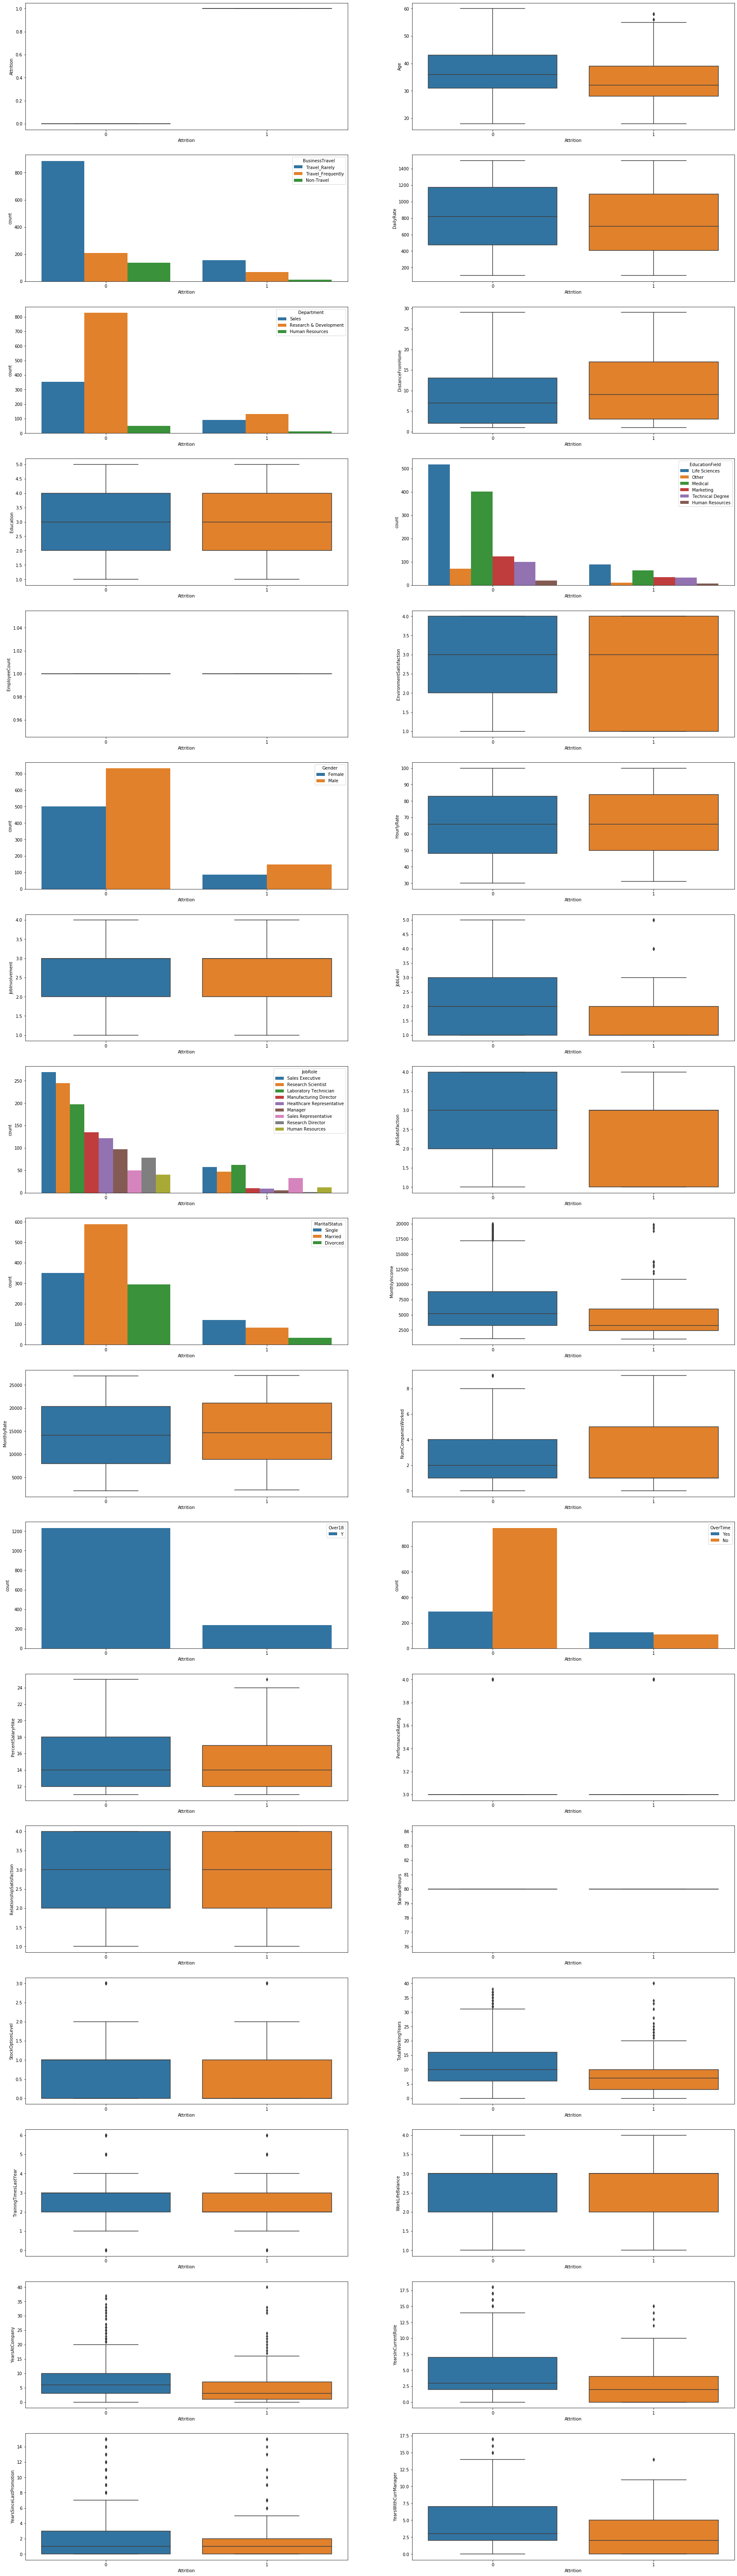

In [328]:
# bivariant Analysis
import seaborn as sb
import matplotlib.pyplot as plt
q = ((len(data.columns))/2)
p=1
plt.figure(figsize=(30,111))
for i in data.columns:
    plt.subplot(q,2,p)
    if(data[i].dtypes=="object"):
        sb.countplot(data.Attrition,hue= data[i])
    else:
        sb.boxplot(data.Attrition,data[i])
    p =p+1

Numerical Variables

In [329]:
#numeric variable
numeric_features = [feature for feature in data.columns if data[feature].dtypes!="object" ]

print('Number of numerical variables: ', len(numeric_features))

Number of numerical variables:  26


In [330]:
data[numeric_features].head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,279,8,1,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,1373,2,2,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [331]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numeric_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [332]:
data[discrete_feature].head()

,Attrition,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,0,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,1,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,0,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,0,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2


# Continuous Variable

In [333]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


In [334]:
data[continuous_feature].head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,5993,19479,8,6
1,49,279,8,61,5130,24907,10,10
2,37,1373,2,92,2090,2396,7,0
3,33,1392,3,56,2909,23159,8,8
4,27,591,2,40,3468,16632,6,2


In [335]:
continuous_feature

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

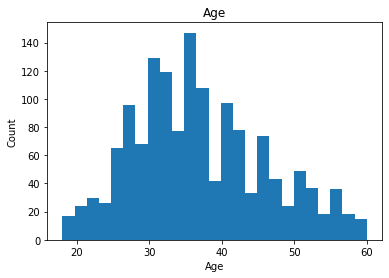

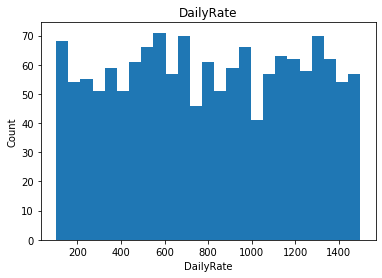

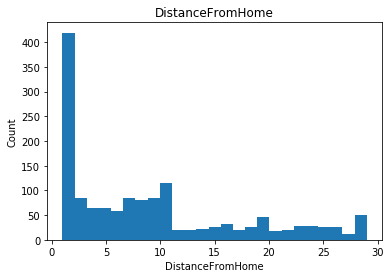

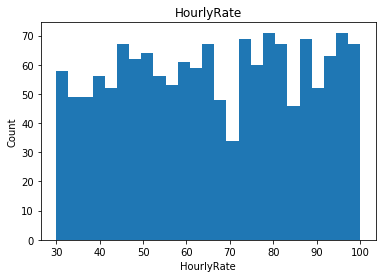

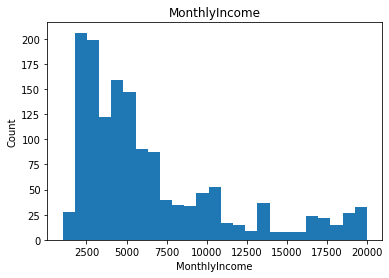

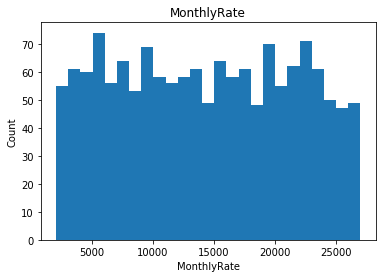

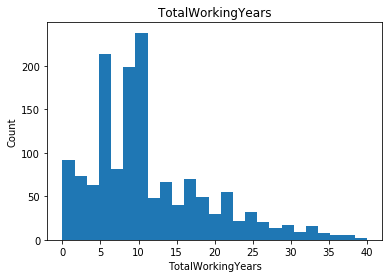

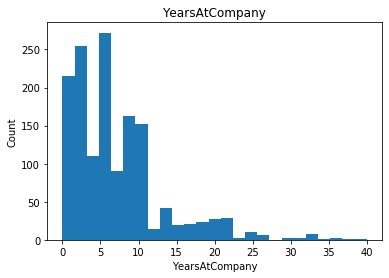

In [336]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    plt.hist(data[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Chceking for outliers

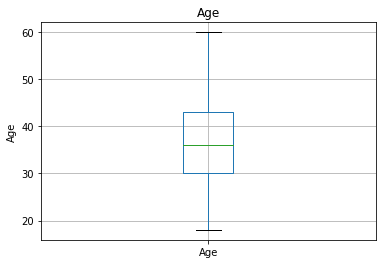

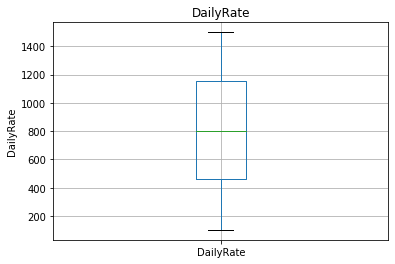

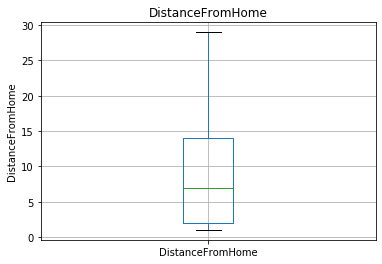

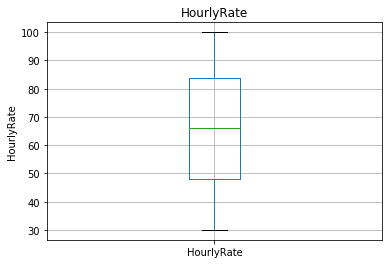

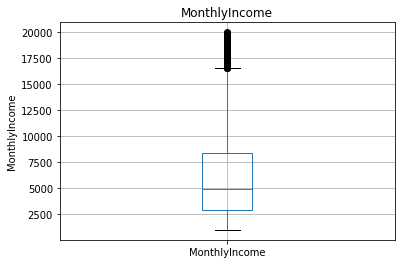

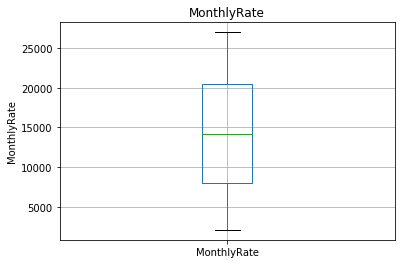

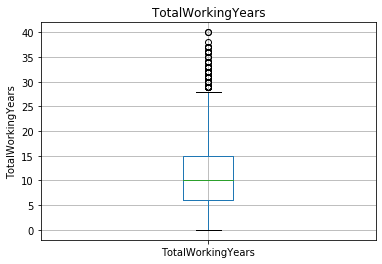

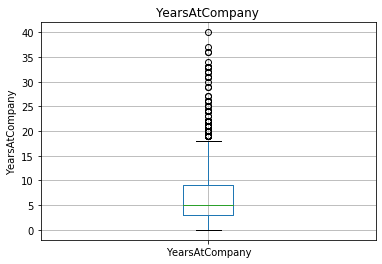

In [337]:
for feature in continuous_feature:
    data.boxplot(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Categorical Variables

In [338]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='object']
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [339]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is BusinessTravel and number of categories are 3
The feature is Department and number of categories are 3
The feature is EducationField and number of categories are 6
The feature is Gender and number of categories are 2
The feature is JobRole and number of categories are 9
The feature is MaritalStatus and number of categories are 3
The feature is Over18 and number of categories are 1
The feature is OverTime and number of categories are 2


In [340]:
feature_to_handle = categorical_features + discrete_feature

In [341]:
feature_to_handle.remove('Attrition')

In [342]:
feature_to_handle

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [343]:
#one hot encoding
dataset =pd.get_dummies(data,columns =feature_to_handle,drop_first=True)

In [344]:
# Standardizing the data using standard scalar
columns_to_scale =continuous_feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[columns_to_scale] = sc.fit_transform(dataset[columns_to_scale])


C:\Users\home\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [345]:
dataset.head()

,Attrition,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,PercentSalaryHike_12,PercentSalaryHike_13,PercentSalaryHike_14,PercentSalaryHike_15,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsInCurrentRole_1,YearsInCurrentRole_2,YearsInCurrentRole_3,YearsInCurrentRole_4,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_7,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,1,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,-0.421642,-0.164613,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.164511,0.488508,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,-0.550208,-1.144294,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.42164

In [346]:
X = dataset.drop(['Attrition'],axis=1)
Y = dataset['Attrition']

Splitting data into train and test set

In [347]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic regression

In [348]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Train score : {model.score(xtrain, ytrain)}\nTest score : {model.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))


Train score : 0.907312925170068
Test score : 0.9047619047619048
[[243   2]
 [ 26  23]]
0.9047619047619048


C:\Users\home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [349]:
import sklearn.metrics as m
probs = lr.predict_log_proba(xtest)
preds =probs[:,1]
fpr,tpr,threshold = m.roc_curve(ytest,preds)
roc_auc = m.auc(fpr,tpr)

In [350]:
roc_auc

0.8499791753436068

**Classification Report (Accuracy, Precision, Recall, F1-score)**

In [351]:
print(m.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       245
           1       0.92      0.47      0.62        49

   micro avg       0.90      0.90      0.90       294
   macro avg       0.91      0.73      0.78       294
weighted avg       0.91      0.90      0.89       294



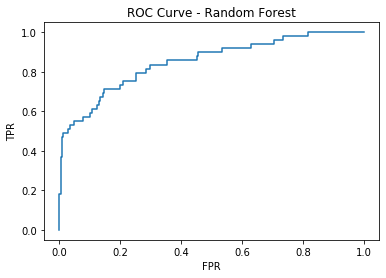

In [352]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

# fitting in various models

# SVM

In [353]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(xtrain, ytrain)

pred = classifier_svm.predict(xtest)

print(f"Train score : {classifier_svm.score(xtrain, ytrain)}\nTest score : {classifier_svm.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

C:\Users\home\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score : 0.8401360544217688
Test score : 0.8333333333333334
[[245   0]
 [ 49   0]]
0.8333333333333334


# KNN

In [354]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(metric='minkowski',p=2)
classifier_knn.fit(xtrain, ytrain)

pred = classifier_knn.predict(xtest)

print(f"Train score : {classifier_knn.score(xtrain, ytrain)}\nTest score : {classifier_knn.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 0.8758503401360545
Test score : 0.826530612244898
[[236   9]
 [ 42   7]]
0.826530612244898


# Decision tree

In [355]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier_tree.fit(xtrain, ytrain)

pred = classifier_tree.predict(xtest)

print(f"Train score : {classifier_tree.score(xtrain, ytrain)}\nTest score : {classifier_tree.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 1.0
Test score : 0.7653061224489796
[[208  37]
 [ 32  17]]
0.7653061224489796


# Random forest

In [357]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
classifier_forest.fit(xtrain, ytrain)

pred = classifier_forest.predict(xtest)

print(f"Train score : {classifier_forest.score(xtrain, ytrain)}\nTest score : {classifier_forest.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 0.9778911564625851
Test score : 0.8367346938775511
[[243   2]
 [ 46   3]]
0.8367346938775511


C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Hyper parameter tunning using Grid search CV

In [358]:
tunning_parameters ={
    'max_depth':range(2,20,1),
    'criterion':['gini','entropy'],
    'n_estimators':[25,50,70,100,200]
}

In [359]:

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(estimator=classifier_forest,param_grid=tunning_parameters,scoring="accuracy",cv=5,n_jobs=-1)
cvmodel =cv.fit(xtrain,ytrain)
print('best_accuracy = ',cvmodel.best_score_)
print('best_parameters = ', cvmodel.best_params_)


best_accuracy =  0.8571428571428571
best_parameters =  {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 50}


In [360]:
classifier_forest = RandomForestClassifier(criterion='entropy',max_depth=11,n_estimators=50)
classifier_forest.fit(xtrain,ytrain)
pred = classifier_forest.predict(xtest)

print(f"Train score : {classifier_forest.score(xtrain, ytrain)}\nTest score : {classifier_forest.score(xtest, ytest)}")
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

Train score : 0.95578231292517
Test score : 0.8435374149659864
[[243   2]
 [ 44   5]]
0.8435374149659864


In [361]:
print(m.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.71      0.10      0.18        49

   micro avg       0.84      0.84      0.84       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.82      0.84      0.79       294



In [362]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,Y)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

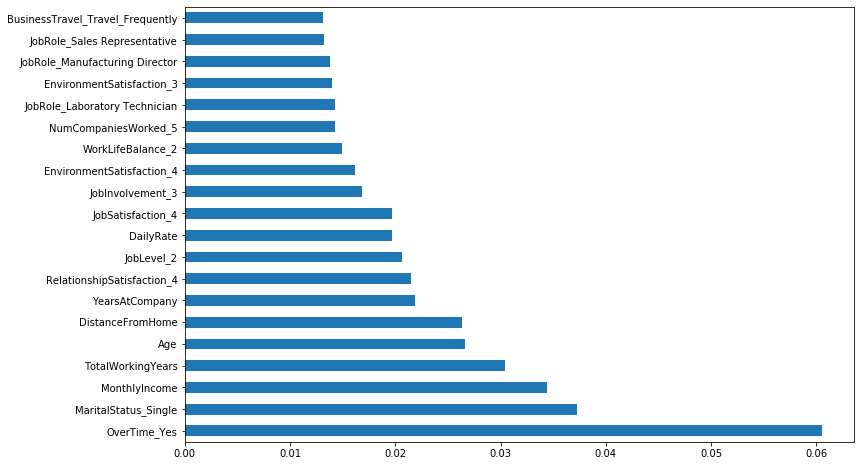

In [363]:
#plot graph of feature importances for better visualization plotting top 2o important features.

plt.figure(figsize = (12,8))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [364]:
#Save the file to reuse

In [383]:
import pickle
file = open('Emp_attrition_prediction.pkl','wb')
pickle.dump(model,file)

In [389]:
classifier = pickle.load(open('Emp_attrition_prediction.pkl','rb'))


In [390]:
pred = classifier.predict(xtest)

In [391]:
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest,pred))

[[243   2]
 [ 26  23]]
0.9047619047619048
